#HW2

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import graphviz 
from mpl_toolkits.mplot3d import Axes3D
!pip install plotly_express
import plotly_express as px
from sklearn import svm
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import math

## Loading the dataset

In [ ]:
# !rm *.csv

# from google.colab import files
# print("Please load the raw csv data")
# uploadedData = files.upload()
# filename = list(uploadedData)[0]

In [ ]:
url_train='https://raw.githubusercontent.com/eladaspis/ML_Wet2/main/train.csv?token=AC7326K3EGOXTNAYQRMYCB3AXIXCY'
url_val='https://raw.githubusercontent.com/eladaspis/ML_Wet2/main/validation.csv?token=AC7326NOGQRNA7F736HJ55DAXIXEI'
url_test='https://raw.githubusercontent.com/eladaspis/ML_Wet2/main/test.csv?token=AC7326NFLATDQI4U47RITNLAXYRVC'
url_real_test = 'https://raw.githubusercontent.com/eladaspis/ML_Wet2/main/virus_test.csv?token=AC7326LCFVODKJAEPHUZQOLAYEUVU'

train = pd.read_csv(url_train)
val=pd.read_csv(url_val)
test=pd.read_csv(url_test)
real_test=pd.read_csv(url_real_test)
# train = train.drop(['AgeGroup', 'HouseholdExpenseParkingTicketsPerYear',
#                     'PCR_46','StepsPerYear'], axis=1)

# val = val.drop(['AgeGroup', 'HouseholdExpenseParkingTicketsPerYear',
#                     'PCR_46','StepsPerYear'], axis=1)
# test = test.drop(['AgeGroup', 'HouseholdExpenseParkingTicketsPerYear',
#                     'PCR_46','StepsPerYear'], axis=1)

train=train.fillna("")
val=val.fillna("")
test=test.fillna("")


train_ID = train.ID.copy()
train = train.drop(['ID'], axis=1)
X_train = train.drop(['Virus', 'SpreadLevel','Risk'], axis=1)
y_train = train[['Virus', 'SpreadLevel','Risk']]

val_ID = val.ID.copy()
val = val.drop(['ID'], axis=1)
X_val = val.drop(['Virus', 'SpreadLevel','Risk'], axis=1)
y_val = val[['Virus', 'SpreadLevel','Risk']]


test_ID = test.ID.copy()
test = test.drop(['ID'], axis=1)
X_test = test.drop(['Virus', 'SpreadLevel','Risk'], axis=1)
y_test = test[['Virus', 'SpreadLevel','Risk']]

real_test_ID = real_test.ID.copy()
X_real_test = real_test.drop(['ID'], axis=1)

In [ ]:
# #shuffle and split the data
# X_train, X_temp, y_train, y_temp = train_test_split(X_train, y[label], test_size=0.4, random_state=11)
# X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=11)
# def remove_empty_rows(X,y):
#  for label in y.columns: 
#    for index in range(len(X)):
#      if y[label] is "":
#           print(X[index])
#        X = X.drop(index)
#        print("removed")

In [ ]:
#model training
#inputs: X_train,y_train,X_val,y_val, model, hyper_par range(1,101)
#outputs: train accuracy array, train loss arr, val accuracy arr, val loss arr
def model_infer(X_train,y_train,X_val,y_val,model,h_range):
  num_of_lables=y_train.shape[1]
  accuracy_train =[[] for i in range(num_of_lables)]
  accuracy_validation = [[] for i in range(num_of_lables)]
  count=0
  for label in y_train:
      for k in h_range:
        if model is LinearSVC:
          clf = LinearSVC(C=k,dual = True).fit(X_train,y_train[label]) 
        elif model is DecisionTreeClassifier:
          clf = model(criterion='entropy',max_depth=k).fit(X_train,y_train[label]) 
        else: 
          clf = model(k).fit(X_train,y_train[label]) 
        y_train_predicted = clf.predict(X_train)
        y_validation_predicted = clf.predict(X_val)
        accuracy_train[count].append(metrics.accuracy_score(y_train[label], y_train_predicted))
        accuracy_validation[count].append(metrics.accuracy_score(y_val[label], y_validation_predicted))
      count+=1
  return accuracy_train,accuracy_validation


In [ ]:
#normalization for data
def normalize_data(df):
  for label in df.columns:
    df[label] = stats.zscore(df[label])
  
def remove_outlier_Indices(X,y):
  X = X.copy()
  y = y.copy()
  for label in X.columns:
    Q1 = X[label].quantile(0.1)
    Q3 = X[label].quantile(0.9)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    index = (X[label] < upper_limit) & (X[label] > lower_limit)
    X = X[index]
    y = y[index]
  return X,y

In [ ]:
#make plots
def make_plots(accuracy_array,title,xlabel,ylabel,rg):
  plt.figure(figsize=(10,6))
  for index in range(len(accuracy_array)):  
    plt.plot(rg,accuracy_array[index])
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid()
  print("Maximum accuracy:-",max(accuracy_array[0]),"at K =",rg[accuracy_array[0].index(max(accuracy_array[0]))])
  print("Maximum accuracy:-",max(accuracy_array[1]),"at K =",rg[accuracy_array[1].index(max(accuracy_array[1]))])
  print("Maximum accuracy:-",max(accuracy_array[2]),"at K =",rg[accuracy_array[2].index(max(accuracy_array[2]))])
  plt.legend(['Virus', 'SpreadLevel','Risk'])


In [ ]:
#normalized data
print(X_train.shape)
normalize_data(X_train)
X_train,y_train = remove_outlier_Indices(X_train,y_train)
print(X_train.shape)
normalize_data(X_val)
X_val,y_val = remove_outlier_Indices(X_val,y_val)
normalize_data(X_test)

# normalize_data(X_val)
# X_train = X_train.fillna(X_train.mean)
# nonOutlierList = Remove_Outlier_Indices(X_train)
# print(nonOutlierList)
# X_train = X_train[nonOutlierList]
# print(X_train)
# for label in X_train.columns:
#   print(X_train[label])
# print(X_train.head(50))

# normalize_data(X_val)
# nonOutlierList = Remove_Outlier_Indices(X_val)
# X_val = X_val[nonOutlierList]


# remove_empty_rows(X_train, y_train)
# remove_empty_rows(X_val, y_val)

(1800, 28)
(1576, 28)


# KNN

Maximum accuracy:- 1.0 at K = 1
Maximum accuracy:- 1.0 at K = 1
Maximum accuracy:- 1.0 at K = 1
Maximum accuracy:- 0.6731141199226306 at K = 10
Maximum accuracy:- 0.5880077369439072 at K = 10
Maximum accuracy:- 0.6731141199226306 at K = 10


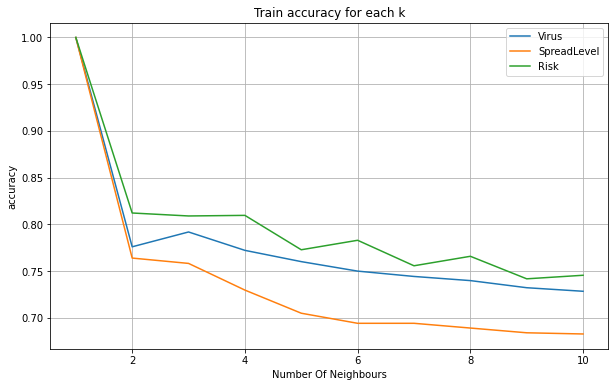

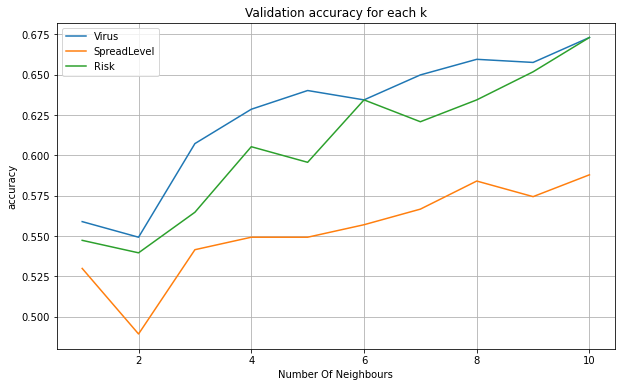

In [ ]:
#main model infer
rg = range(1,11)
train_acc_arr_knn,val_acc_arr_knn=model_infer(X_train, y_train, X_val, y_val ,KNeighborsClassifier,rg)
#main model plot
make_plots(train_acc_arr_knn,'Train accuracy for each k','Number Of Neighbours','accuracy',rg)
make_plots(val_acc_arr_knn,'Validation accuracy for each k','Number Of Neighbours','accuracy',rg)

# Decision Trees

Maximum accuracy:- 0.9029187817258884 at K = 10
Maximum accuracy:- 0.9854060913705583 at K = 10
Maximum accuracy:- 0.9898477157360406 at K = 10
Maximum accuracy:- 0.6750483558994197 at K = 9
Maximum accuracy:- 0.8433268858800773 at K = 9
Maximum accuracy:- 0.8201160541586073 at K = 5


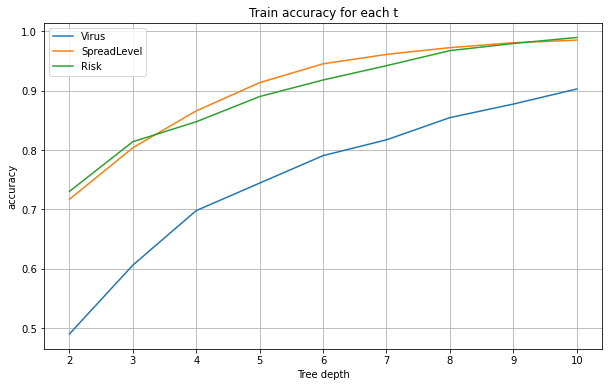

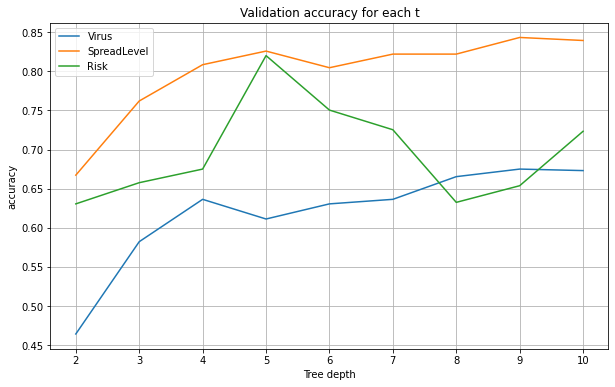

In [ ]:
#main model infer
rg = range(2,11)
train_acc_arr_dt,val_acc_arr_dt=model_infer(X_train, y_train, X_val, y_val ,DecisionTreeClassifier,rg)
#Q6 main model plot
make_plots(train_acc_arr_dt,'Train accuracy for each t','Tree depth','accuracy',rg)
make_plots(val_acc_arr_dt,'Validation accuracy for each t','Tree depth','accuracy',rg)

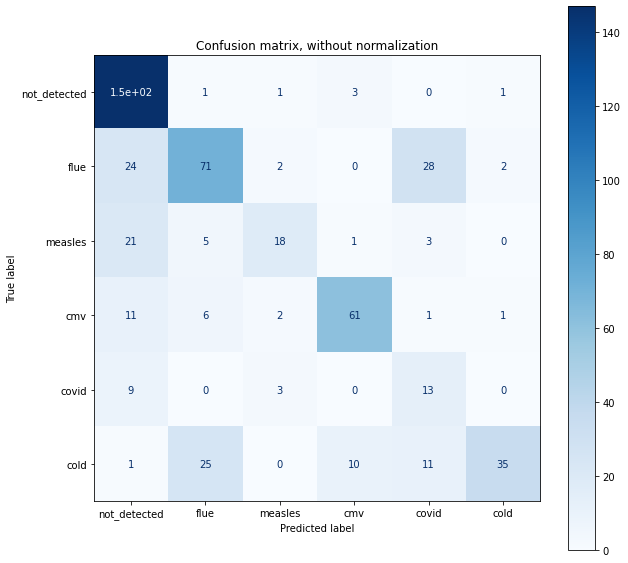

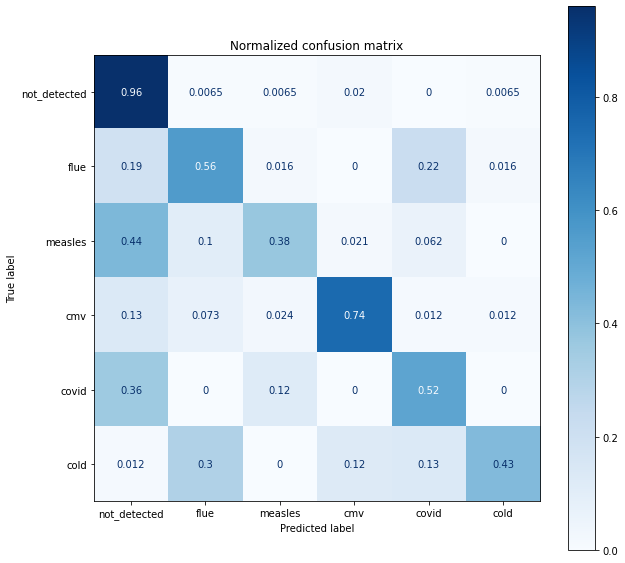

In [ ]:
#Q8
optimal_depth=val_acc_arr_dt[0].index(max(val_acc_arr_dt[0]))+2
clf = DecisionTreeClassifier(criterion='entropy',max_depth=optimal_depth).fit(X_train,y_train['Virus'])
y_val_pred = clf.predict(X_val)

#print confusion matrix
confusion_matrix(y_val['Virus'], y_val_pred, labels=y_val['Virus'].unique())

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
  fig, ax = plt.subplots(figsize=(10, 10))
  disp = plot_confusion_matrix(clf, X_val, y_val['Virus'],
                                 display_labels=y_val['Virus'].unique(),    cmap=plt.cm.Blues,normalize=normalize, ax=ax)
  disp.ax_.set_title(title)
plt.show()

# mat = confusion_matrix(ytest, yfit)
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
#             xticklabels=faces.target_names,
#             yticklabels=faces.target_names)
# plt.xlabel('true label')
# plt.ylabel('predicted label');


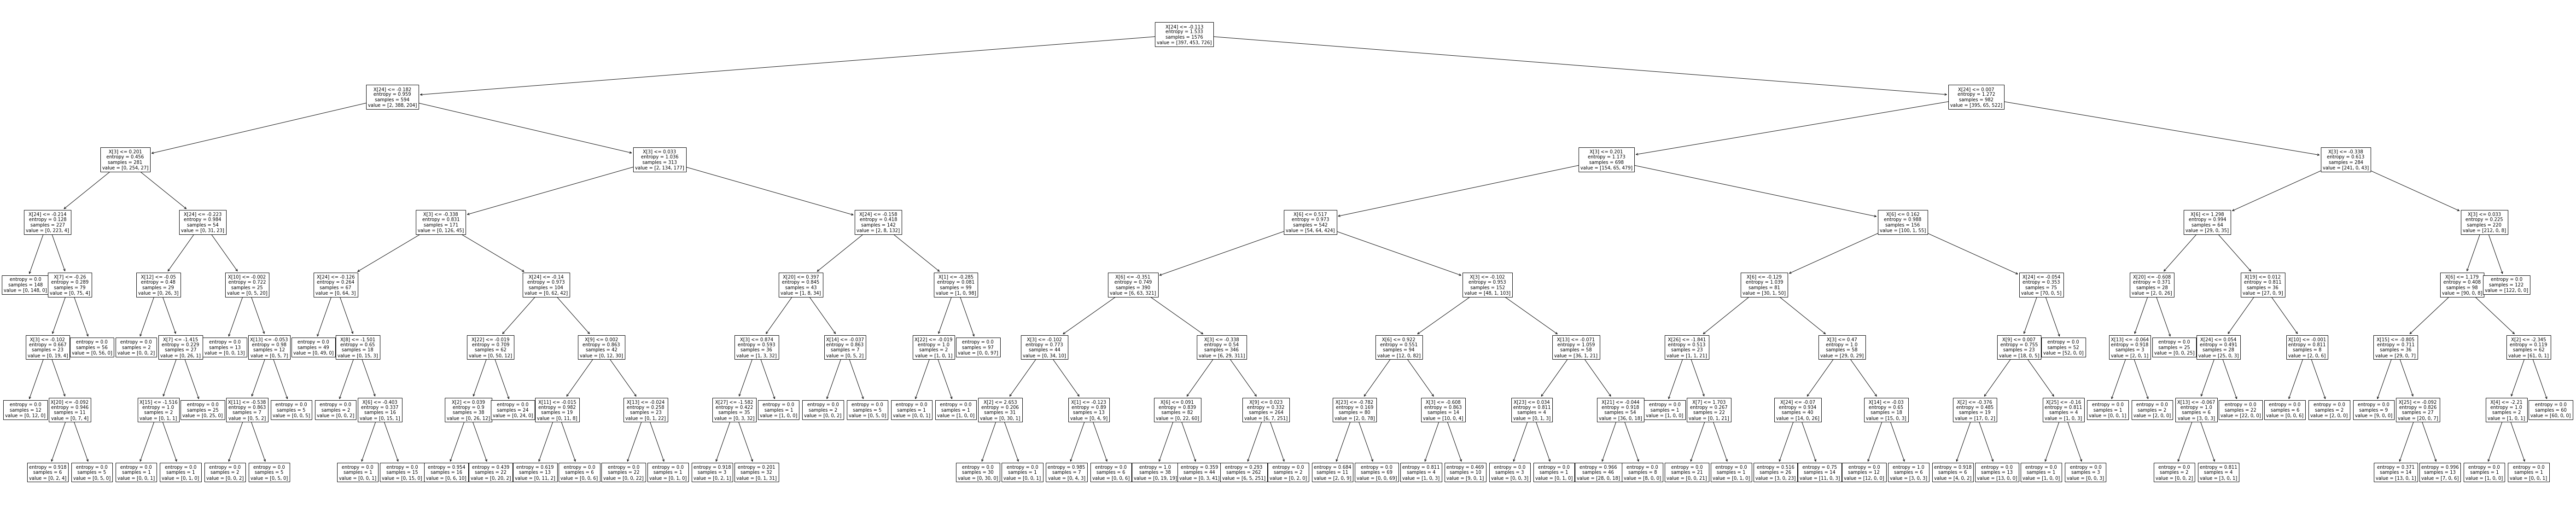

In [ ]:
#Q9 Plot the decision tree
test_depth=7
clf = DecisionTreeClassifier(criterion='entropy',max_depth=test_depth).fit(X_train,y_train['Risk'])
y_val_pred = clf.predict(X_val)
plt.figure(figsize=(100,20))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

score: 0.8959390862944162


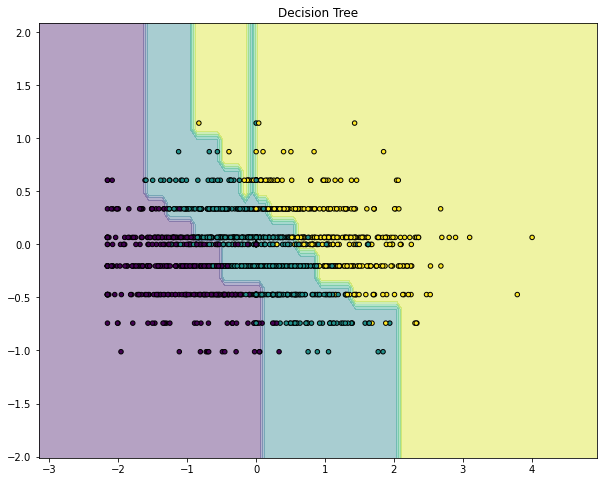

score: 0.9110251450676983


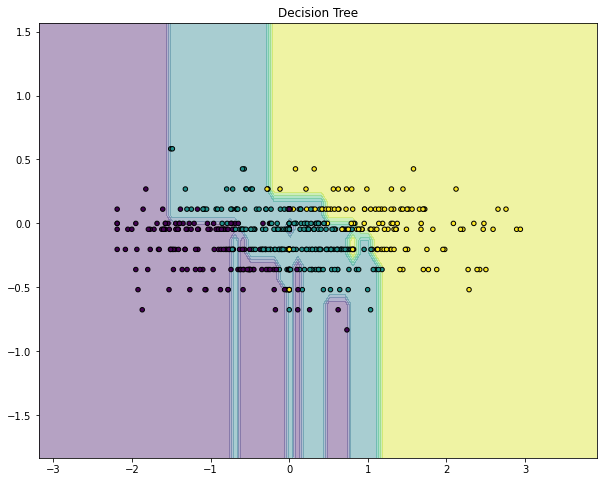

In [ ]:
#Q10 Plot the decision boundaries
def decision_boundaries(X,y, features):
  clf = DecisionTreeClassifier(criterion='entropy',max_depth=7)
  clf.fit(X,y)
  # print(X[features[0]].min())
  # print(X[features[0]].max())
  # print(X[features[1]].min())
  # print(X[features[1]].max())

  x_min, x_max = X[features[0]].min() - 1, X[features[0]].max() + 1
  y_min, y_max = X[features[1]].min() - 1, X[features[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                       np.arange(y_min, y_max, 0.1))
  f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  print("score:" , clf.score(X,y))
  axarr.contourf(xx, yy, Z, alpha=0.4)
  axarr.scatter(X[features[0]], X[features[1]], c=y,
                s=20, edgecolor='k')
  axarr.set_title('Decision Tree')
  plt.show()

convert_dict = {'low': 1, 'medium': 2, 'high':3 }
y_train_risk_converted = y_train.Risk.apply(lambda r: convert_dict[r])
y_val_risk_converted = y_val.Risk.apply(lambda r: convert_dict[r])

best_features = ['HouseholdExpenseOnSocialGames','DisciplineScore']
decision_boundaries(X_train[best_features],y_train_risk_converted, best_features)
decision_boundaries(X_val[best_features],y_val_risk_converted, best_features)

8


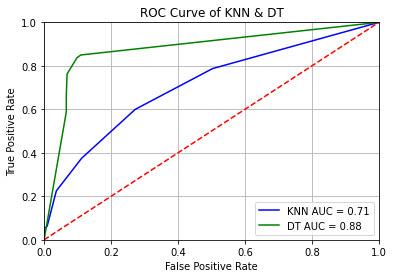

In [ ]:
#Q11 ROC tested on validation set Knn and decision tree
best_k=val_acc_arr_knn[1].index(max(val_acc_arr_knn[1]))+1

knn = KNeighborsClassifier(n_neighbors = best_k)

#train numeric convertion label
y_train_temp=y_train['SpreadLevel'].copy()
y_t = pd.Series([1 if item == 'high' else 0 for item in y_train_temp])

y_t=y_t.astype(bool)
knn.fit(X_train,y_t)

#validation to bool
y_val_temp=y_val['SpreadLevel'].copy()
y_v=pd.Series([1 if item == 'high' else 0 for item in y_val_temp])

#print(y_t.unique())
# for a in range(len(y_v)):
#   if y_v[a]=='high':
#     y_v[a]=1
#   else:
#     y_v[a]=0
y_v=y_v.astype(bool)
#print(len(y_v))

# test_depth = val_acc_arr_dt[1].index(max(val_acc_arr_dt[1]))+2
test_depth = val_acc_arr_dt[1].index(max(val_acc_arr_dt[1]))+1
print(test_depth)

#TREE
tree2 = DecisionTreeClassifier(criterion="entropy",max_depth=test_depth).fit(X_train,y_t)
y_scores2 = tree2.predict_proba(X_val)

#KNN
y_scores = knn.predict_proba(X_val)

fpr, tpr, threshold = roc_curve(y_v, y_scores[:, 1])
fpr2, tpr2, threshold2 = roc_curve(y_v, y_scores2[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'KNN AUC = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, 'g', label = 'DT AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN & DT')
plt.grid()
plt.show()

# SVM

Maximum accuracy:- 0.625 at K = 10.0
Maximum accuracy:- 0.8439086294416244 at K = 10.0
Maximum accuracy:- 0.8813451776649747 at K = 2.154434690031882
Maximum accuracy:- 0.6441005802707931 at K = 2.154434690031882
Maximum accuracy:- 0.8027079303675049 at K = 2.154434690031882
Maximum accuracy:- 0.8278529980657641 at K = 0.46415888336127725


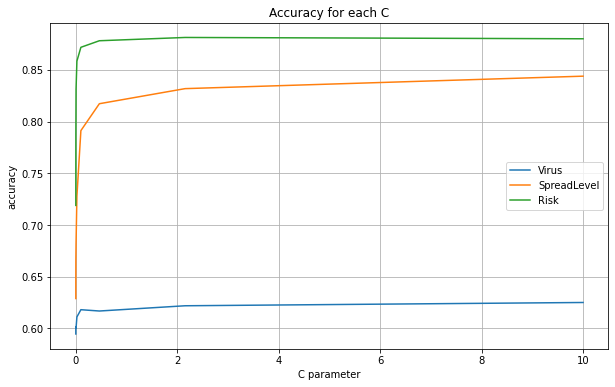

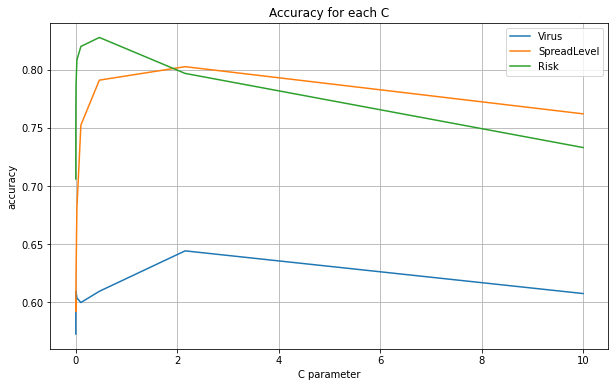

In [ ]:
#main model infer
rg = np.logspace(-5,1,num=10)
# train_acc_arr_svm,val_acc_arr_svm=model_infer(X_train, y_train, X_val, y_val ,LinearSVC,rg)

# #main model plot
# make_plots(train_acc_arr_svm,'Accuracy for each C','C parameter','accuracy',rg)
# make_plots(val_acc_arr_svm,'Accuracy for each C','C parameter','accuracy',rg)

# rg = np.linspace(0.01,50,num=100)

train_acc_arr_svm,val_acc_arr_svm=model_infer(X_train, y_train, X_val, y_val ,LinearSVC,rg)

#main model plot
make_plots(train_acc_arr_svm,'Accuracy for each C','C parameter','accuracy',rg)
make_plots(val_acc_arr_svm,'Accuracy for each C','C parameter','accuracy',rg)

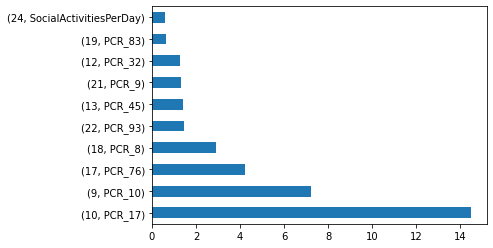

In [ ]:
#Q15
best_C=32.3267
clf = LinearSVC(C=best_C,dual = True).fit(X_train,y_train['Virus'])
flu_index=np.where(clf.classes_=='flue')[0][0]
index = enumerate(X_train.columns)
pd.Series(abs(clf.coef_[flu_index]), index=index).nlargest(10).plot(kind='barh')

In [ ]:
#q17
rows_list = ["KNN", "DT", "SVM"]
columns_list = ["Virus", "risk", "spread"]
test_accuracies = [[] for i in range(3)]
best_values = [[] for i in range(3)]
#KNN
rg = range(1,101)
# best_values[0].append(rg[val_acc_arr_knn[0].index(max(val_acc_arr_knn[0]))])
best_values[0].append(rg[val_acc_arr_knn[0].index(max(val_acc_arr_knn[0]))])
best_values[0].append(rg[val_acc_arr_knn[1].index(max(val_acc_arr_knn[1]))])
best_values[0].append(rg[val_acc_arr_knn[2].index(max(val_acc_arr_knn[2]))])

for k,label in zip(best_values[0],y_train.columns):
  clf = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train[label]) 
  test_accuracies[0].append(clf.score(X_test,y_test[label]))

rg = range(2,101)

best_values[1].append(rg[val_acc_arr_dt[0].index(max(val_acc_arr_dt[0]))])
best_values[1].append(10)
# best_values[1].append(rg[val_acc_arr_dt[1].index(max(val_acc_arr_dt[1]))])
best_values[1].append(rg[val_acc_arr_dt[2].index(max(val_acc_arr_dt[2]))])


for depth,label in zip(best_values[0],y_train.columns):
  clf = DecisionTreeClassifier(criterion='entropy', max_depth=k).fit(X_train,y_train[label]) 
  test_accuracies[1].append(clf.score(X_test,y_test[label]))

rg = np.linspace(0.01,50,num=100)
best_values[2].append(rg[val_acc_arr_svm[0].index(max(val_acc_arr_svm[0]))])
best_values[2].append(rg[val_acc_arr_svm[1].index(max(val_acc_arr_svm[1]))])
best_values[2].append(rg[val_acc_arr_svm[2].index(max(val_acc_arr_svm[2]))])

print(best_values)
for C_value,label in zip(best_values[2],y_train.columns):
  clf = LinearSVC(C=C_value,dual = True).fit(X_train,y_train[label]) 
  test_accuracies[2].append(clf.score(X_test,y_test[label]))

pd.DataFrame(test_accuracies, rows_list, columns_list)


[[10, 10, 10], [9, 10, 5], [4.049595959595959, 4.049595959595959, 3.544646464646464]]


,Virus,risk,spread
KNN,0.641667,0.645000,0.593333
DT,0.608333,0.550000,0.665000
SVM,0.520000,0.496667,0.741667


In [ ]:
#instead random numbers, we should calculate the test accuracy
data = np.array([[max(val_acc_arr_knn[0]), max(val_acc_arr_knn[1]), max(val_acc_arr_knn[2])],
                 [max(val_acc_arr_dt[0]), max(val_acc_arr_dt[1]), max(val_acc_arr_dt[2])],
                 [max(val_acc_arr_svm[0]), max(val_acc_arr_svm[1]), max(val_acc_arr_svm[2])]])

pd.DataFrame(data, rows_list, columns_list)

,Virus,risk,spread
KNN,0.688588,0.601547,0.675048
DT,0.700193,0.864603,0.822050
SVM,0.647969,0.804642,0.827853


# Part 5

In [ ]:
# train_sub = train.copy()
# for index, row in train_sub.iterrows():
#   if row['Virus'] !='covid' and row['Virus'] !='cmv':
#     train_sub.drop(index, inplace=True)

# val_sub = val.copy()
# for index, row in val_sub.iterrows():
#   if row['Virus'] !='covid' and row['Virus'] !='cmv':
#     val_sub.drop(index, inplace=True)

train_sub = train.copy()
for index, row in train_sub.iterrows():
  if row['Virus'] !='covid' and row['Virus'] !='cmv':
    train_sub.drop(index, inplace=True)

val_sub = val.copy()
for index, row in val_sub.iterrows():
  if row['Virus'] !='covid' and row['Virus'] !='cmv':
    val_sub.drop(index, inplace=True)

color_dict = {'covid': 'red', 'cmv':'blue'}

px.scatter_3d(train_sub, x="PCR_7", y="PCR_72", z="PCR_89",
              color='Virus', color_discrete_map = color_dict)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
X_train_sub = train_sub.drop(['Virus', 'SpreadLevel','Risk'], axis=1)
#normalize_data(X_train_sub)
y_train_sub = train_sub.Virus
X_val_sub = val_sub.drop(['Virus', 'SpreadLevel','Risk'], axis=1)
y_val_sub = val_sub.Virus

In [ ]:
#polynom iteration:
for i in range(2,20):
  svclassifier = SVC(kernel='poly', degree=8)
  svclassifier.fit(X_train_sub, y_train_sub)
  y_pred = svclassifier.predict(X_val_sub)
  print(classification_report(y_val_sub,y_pred))

y_pred_train = svclassifier.predict(X_train_sub)
print(classification_report(y_train_sub,y_pred_train))

              precision    recall  f1-score   support

         cmv       0.75      0.97      0.85       174
       covid       0.29      0.04      0.06        57

    accuracy                           0.74       231
   macro avg       0.52      0.50      0.46       231
weighted avg       0.64      0.74      0.66       231

              precision    recall  f1-score   support

         cmv       0.75      0.97      0.85       174
       covid       0.29      0.04      0.06        57

    accuracy                           0.74       231
   macro avg       0.52      0.50      0.46       231
weighted avg       0.64      0.74      0.66       231

              precision    recall  f1-score   support

         cmv       0.75      0.97      0.85       174
       covid       0.29      0.04      0.06        57

    accuracy                           0.74       231
   macro avg       0.52      0.50      0.46       231
weighted avg       0.64      0.74      0.66       231

              preci

In [ ]:
#polynom
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train_sub, y_train_sub)
y_pred = svclassifier.predict(X_val_sub)
print(classification_report(y_val_sub,y_pred))

y_pred_train = svclassifier.predict(X_train_sub)
print(classification_report(y_train_sub,y_pred_train))

              precision    recall  f1-score   support

         cmv       0.75      0.97      0.85       174
       covid       0.29      0.04      0.06        57

    accuracy                           0.74       231
   macro avg       0.52      0.50      0.46       231
weighted avg       0.64      0.74      0.66       231

              precision    recall  f1-score   support

         cmv       0.76      1.00      0.86       512
       covid       1.00      0.08      0.15       179

    accuracy                           0.76       691
   macro avg       0.88      0.54      0.51       691
weighted avg       0.82      0.76      0.68       691



In [ ]:
#rbf
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train_sub, y_train_sub)
y_pred = svclassifier.predict(X_val_sub)
print(classification_report(y_val_sub,y_pred))

y_pred_train = svclassifier.predict(X_train_sub)
print(classification_report(y_train_sub,y_pred_train))


              precision    recall  f1-score   support

         cmv       0.75      0.98      0.85       174
       covid       0.00      0.00      0.00        57

    accuracy                           0.74       231
   macro avg       0.38      0.49      0.43       231
weighted avg       0.56      0.74      0.64       231

              precision    recall  f1-score   support

         cmv       0.75      1.00      0.86       512
       covid       1.00      0.03      0.06       179

    accuracy                           0.75       691
   macro avg       0.87      0.52      0.46       691
weighted avg       0.81      0.75      0.65       691



In [ ]:
X_train_sub = train_sub.drop(['Virus', 'SpreadLevel','Risk'], axis=1)
normalize_data(X_train_sub)
y_train_sub = train_sub.Virus
X_val_sub = val_sub.drop(['Virus', 'SpreadLevel','Risk'], axis=1)
y_val_sub = val_sub.Virus
normalize_data(X_val_sub)
classifiers_train,classifiers_val = [],[]
rg = [1/10*item for item in range(1,1000)]
# for kernel in ['rbf']:
for index, i in enumerate(rg):
  model = svm.SVC(kernel="rbf",C=i)
  clf = model.fit(X_train_sub, y_train_sub)
  classifiers_train.append((index, clf.score(X_train_sub,y_train_sub)))
  # classifiers_val.append(index, clf.score(X_val_sub,y_val_sub))
                                             
#plot
print(rg)
print(classifiers_train)

# make_plots(classifiers_train[:1],'Accuracy for each gamma','Gamma value','Accuracy',range(1,100))
# make_plots(classifiers_val,'Accuracy for each gamma','Gamma value','Accuracy',rg)



[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0, 5.1000000000000005, 5.2, 5.300000000000001, 5.4, 5.5, 5.6000000000000005, 5.7, 5.800000000000001, 5.9, 6.0, 6.1000000000000005, 6.2, 6.300000000000001, 6.4, 6.5, 6.6000000000000005, 6.7, 6.800000000000001, 6.9, 7.0, 7.1000000000000005, 7.2, 7.300000000000001, 7.4, 7.5, 7.6000000000000005, 7.7, 7.800000000000001, 7.9, 8.0, 8.1, 8.200000000000001, 8.3, 8.4, 8.5, 8.6, 8.700000000000001, 8.8, 8.9, 9.0, 9.1, 9.200000000000001, 9.3, 9.4, 9.5, 9.600000000000001, 9.700000000000001, 

In [ ]:
C_2d_range = range(1,25)
gamma_2d_range = range(1,25)
classifiers_train = []
classifiers_val = []
for C in C_2d_range:
  for gamma in gamma_2d_range:
    clf = svm.SVC(kernel='rbf', C=C, gamma=1/gamma)
    clf.fit(X_train_sub, y_train_sub)
    classifiers_train.append([C,gamma, clf.score(X_train_sub,y_train_sub)])
    classifiers_val.append([C,gamma, clf.score(X_val_sub,y_val_sub)])


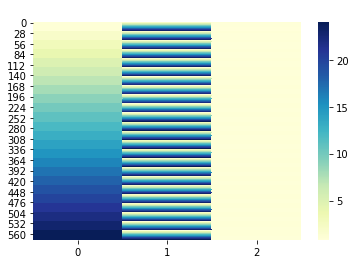

In [ ]:
ax = sns.heatmap(classifiers_train,cmap="YlGnBu")
ax.set_title(' ');

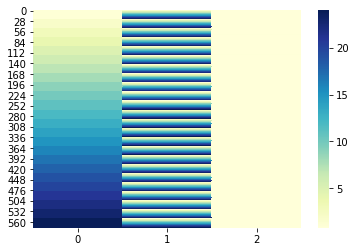

In [ ]:
ax = sns.heatmap(classifiers_val,cmap="YlGnBu")


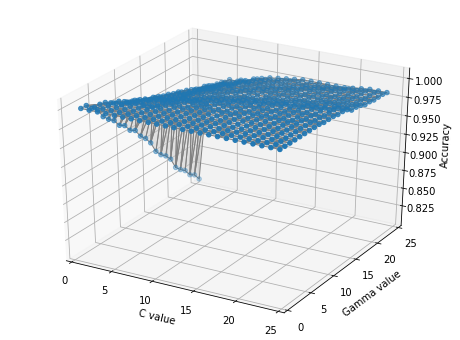

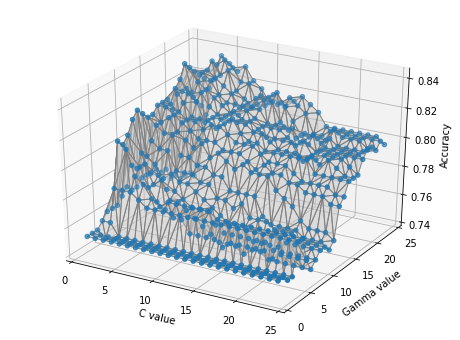

In [ ]:
#Q22
for clf in [classifiers_train,classifiers_val]:
  x= [item[0] for item in clf]
  y= [item[1] for item in clf]
  z= [item[2] for item in clf]
  fig = plt.figure(figsize=(8, 6))

  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlabel('C value')
  ax.set_ylabel('Gamma value')
  ax.set_zlabel('Accuracy')
  ax.plot_trisurf(x, y, z, color='white', edgecolors='grey', alpha=0.5)
  pnt3d=ax.scatter(x,y,z)
  plt.show()


# Edit test_virus.csv - removing features

In [ ]:
from scipy.stats import zscore
to_convert=['Sex', 'BloodType','Job']
X_real_test[to_convert] = X_real_test[to_convert].astype('category')
X_real_test = X_real_test.drop(columns=['Job','PCR_11','PCR_15','Address','DateOfPCRTest','CurrentLocation','Self_declaration_of_Illness_Form','Sex','BloodType','SportsPerDay','MedicalCarePerYear'])
X_real_test = X_real_test.apply(pd.to_numeric, errors='ignore')


for label in X_real_test.columns:
  temp = []
  for val in X_real_test[label]:
    if math.isnan(float(val)):
      print(np.nanmean(X_real_test[label]))
      temp.append(np.nanmean(X_real_test[label]))
    else:
      temp.append(val)
  X_real_test[label] = temp
normalize_data(X_real_test)

4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.666666666666667
4.66666666

Part 7 - Submitted model predictions

In [ ]:
from google.colab import files
print(X_real_test.to_string())
outputPath= 'pred_knn.csv'
df = pd.DataFrame()
for index, label in enumerate(y_train.columns):
  best_k_knn = best_values[0][index]
  clf = KNeighborsClassifier(n_neighbors=best_k_knn).fit(X_train,y_train[label]) 
  predictions = clf.predict(X_real_test)
  df.insert(index, label, predictions, True)
df.insert(0, 'ID', real_test_ID, True)
df.to_csv(outputPath, index=False)
files.download(outputPath) 

outputPath= 'pred_dt.csv'
df = pd.DataFrame()
for index, label in enumerate(y_train.columns):
  best_depth = best_values[1][index]
  clf = DecisionTreeClassifier(criterion="entropy",max_depth=best_depth).fit(X_train,y_train[label]) 
  predictions = clf.predict(X_real_test)
  df.insert(index, label, predictions, True)
df.insert(0, 'ID', real_test_ID, True)
df.to_csv(outputPath, index=False)
files.download(outputPath) 


outputPath= 'pred_svm.csv'
df = pd.DataFrame()
for index, label in enumerate(y_train.columns):
  best_c = best_values[2][index]
  clf = LinearSVC(C=best_c,dual = True).fit(X_train,y_train[label]) 
  predictions = clf.predict(X_real_test)
  df.insert(index, label, predictions, True)
df.insert(0, 'ID', real_test_ID, True)
df.to_csv(outputPath, index=False)
files.download(outputPath) 


# How to download from Colab?

In [ ]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath) 